## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

<font size=4>Grader function 1 </font>

In [6]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [7]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Reviews.csv")
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
reviews.shape

(568454, 10)

In [9]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
reviews = reviews[['Score','Text']]  #get only 2 columns - Text, Score
reviews.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [12]:
reviews.info()  # No NAN values in both columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568454 non-null  int64 
 1   Text    568454 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [13]:
reviews['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [14]:
reviews = reviews[reviews.Score != 3]

In [15]:
reviews.loc[reviews['Score'] < 3, 'Score'] = 0

In [16]:
reviews.loc[reviews['Score'] > 3,"Score"] = 1
reviews.head()

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


In [17]:
reviews['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

<font size=4>Grader function 2 </font>

In [18]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [19]:
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [20]:
# #remove HTML from the Text column and save in the Text column only
reviews['Text'] = reviews['Text'].str.replace(r'<[^<>]*>','', regex=True)

In [21]:
reviews.head(5)

,Score,Text,len
64117,1,The tea was of great quality and it tasted lik...,30
418112,1,My cat loves this. The pellets are nice and s...,31
357829,1,Great product. Does not completely get rid of ...,41
175872,1,This gum is my favorite! I would advise every...,27
178716,1,I also found out about this product because of...,22


In [22]:
#split the data into train and test data(20%) with Stratify sampling, random state 33,
from sklearn.model_selection import train_test_split
x = reviews['Text']
y = reviews['Score']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=33)


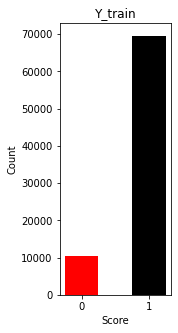

In [45]:
from collections import Counter
import matplotlib.pyplot as plt
s= Counter(y_train)
keys = list(s.keys())
values = list(s.values())
fig = plt.figure(figsize = (2, 5))
# creating the bar graph
plt.bar(keys, values, color =['black','red'],width=0.5)
plt.title('Y_train')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

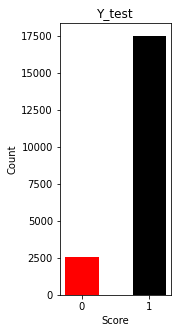

In [44]:
s= Counter(y_test)
keys = list(s.keys())
values = list(s.values())
fig = plt.figure(figsize = (2, 5))
# creating the bar graph
plt.bar(keys, values, color =['black','red'],width=0.5)
plt.title('Y_test')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [46]:
print(X_train.shape,X_test.shape)

(80000,) (20000,)


In [47]:
print(y_train.shape,y_test.shape)

(80000,) (20000,)


In [48]:
#saving to disk. if we need, we can load preprocessed data directly. 
reviews.to_csv('preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERt. 
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [49]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [50]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 55)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 55)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 55)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 55, 768)]                 'input_mask[0][0]',         

In [51]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [52]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [53]:
!pip3 install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.4 MB/s eta 0:00:00


In [54]:
!pip install bert-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.5 MB/s eta 0:00:00


In [55]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')

In [56]:
import tokenization #We have given tokenization.py file

In [57]:
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case )

<font size=4>Grader function 3 </font>

In [58]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [59]:
max_tokens = 55
def tokenize_data(input,max_tokens):
  X_tokens = np.zeros((input.shape[0], max_tokens))
  X_mask = np.zeros((input.shape[0], max_tokens))
  X_segment = np.zeros((input.shape[0], max_tokens))
  for i in range(input.shape[0]):
    temp_tokens = tokenizer.tokenize(input.values[i])
    if (len(temp_tokens) >= max_tokens-2):
      temp_tokens = temp_tokens[0:(max_tokens-2)]
    temp_tokens = ['[CLS]',*temp_tokens,'[SEP]']
    pad = max_tokens-len(temp_tokens)
    X_tokens[i] = np.array(tokenizer.convert_tokens_to_ids(temp_tokens)+[0]*pad)
    X_mask[i] = np.array([1]*len(temp_tokens)+[0]*pad)
  return X_tokens, X_mask, X_segment
X_train_tokens, X_train_mask, X_train_segment = tokenize_data(X_train, max_tokens)
X_test_tokens, X_test_mask, X_test_segment = tokenize_data(X_test,max_tokens)

In [60]:
import pickle

In [61]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

<font size=4>Grader function 4 </font>

In [62]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_train_segment)
        
        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

<font size=4>Grader function 5 </font>

In [63]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segment)
        
        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [64]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [65]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [66]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
#this cell will take some time to execute, make sure thay you have stable internet connection
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

2500/2500 [==============================] - 306s 120ms/step


In [67]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

625/625 [==============================] - 76s 122ms/step


In [68]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

<font size=4>Grader function 6 </font>

In [69]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1.<b> You have to use AUC as metric. Do not use tf.keras.metrics.AUC</b> 
<b> You have to write custom code for AUC and print it at the end of each epoch</b> 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [70]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization
import tensorflow.keras.backend as K

In [71]:
K.clear_session()
input_layer = Input(shape=(768,))
layer1 = Dense(1024, activation="relu",name = 'layer1')(input_layer)
normal1 = BatchNormalization(name='normal1')(layer1)
dropout = Dropout(0.25)(normal1)
layer2  = Dense(2048, activation="relu",name='layer2')(dropout)
normal2 = BatchNormalization(name='normal2')(layer2)
dropout1 = Dropout(0.25)(normal2)
layer3 = Dense(512, activation="relu",name='layer3')(dropout1)
normal3 = BatchNormalization(name='normal3')(layer3)
dropout2 = Dropout(0.25)(normal3)
output_layer = Dense(1, activation="sigmoid")(dropout2)
model = Model(inputs=input_layer,outputs=output_layer) 

In [72]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 layer1 (Dense)              (None, 1024)              787456    
                                                                 
 normal1 (BatchNormalization  (None, 1024)             4096      
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 layer2 (Dense)              (None, 2048)              2099200   
                                                                 
 normal2 (BatchNormalization  (None, 2048)             8192      
 )                                                           

In [73]:
filepath="/content/drive/MyDrive/data/logs/fit/"+"model_checkpoint"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
log_dir='/content/drive/MyDrive/data/logs/fit/model_logs'
reduce_lr=ReduceLROnPlateau(monitor="val_auc",patience=2,factor=0.15)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)
callbk_list = [tensorboard_callback,checkpoint,reduce_lr]

In [78]:
def auc_1(y_true, y_pred):
  if len(np.unique(y_true)) == 1:
    return 0.5
  else:
    return roc_auc_score(y_true, y_pred)
def auc(y_true, y_pred):
  return tf.py_function(auc_1, (y_true, y_pred), tf.float32)

In [80]:
model.compile(optimizer="adam",loss='BinaryCrossentropy',metrics=[auc])
model.fit(X_train_pooled_output,y_train,validation_data=(X_test_pooled_output,y_test),batch_size=64,epochs=10,callbacks=callbk_list)

Epoch 1/10
1244/1250 [============================>.] - ETA: 0s - loss: 0.1707 - auc: 0.9585
Epoch 1: val_auc improved from -inf to 0.95255, saving model to /content/drive/MyDrive/data/logs/fit/model_checkpoint
1250/1250 [==============================] - 56s 11ms/step - loss: 0.1709 - auc: 0.9585 - val_loss: 0.3823 - val_auc: 0.9526 - lr: 0.0010
Epoch 2/10
1247/1250 [============================>.] - ETA: 0s - loss: 0.1686 - auc: 0.9601
Epoch 2: val_auc improved from 0.95255 to 0.95338, saving model to /content/drive/MyDrive/data/logs/fit/model_checkpoint
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1687 - auc: 0.9601 - val_loss: 0.3597 - val_auc: 0.9534 - lr: 0.0010
Epoch 3/10
1248/1250 [============================>.] - ETA: 0s - loss: 0.1665 - auc: 0.9617
Epoch 3: val_auc improved from 0.95338 to 0.95396, saving model to /content/drive/MyDrive/data/logs/fit/model_checkpoint
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1666 - auc: 0.96

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 
1. Pipeline is a way to codify and automate the workflow.
2. Download the test.csv file from here <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a> </pre>


In [ ]:
#there is an alterante way to load files from Google drive directly to your Colab session
# you can use gdown module to import the files as follows
#for example for test.csv you can write your code as !gdown --id file_id (remove the # from next line and run it)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [85]:
import re
def pipeline():
  test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
  test['Text']=test['Text'].apply(lambda x:re.sub(r'<.*?>','',x))
  pred_tokens, pred_masks , pred_segments = tokenize_data(test['Text'],max_tokens)
  test_pooled_output = bert_model.predict([pred_tokens,pred_masks,pred_segments])
  print(f' Pooled output shape: {test_pooled_output.shape}')
  test_predict = model.predict(test_pooled_output)
  return np.where(test_predict < 0.5 ,0,1)
predicted_test=np.array(tf.squeeze(pipeline()))
predicted_test

11/11 [==============================] - 1s 125ms/step
 Pooled output shape: (352, 768)
11/11 [==============================] - 0s 2ms/step


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

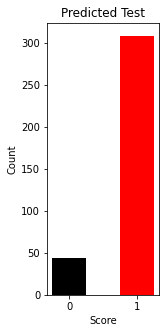

In [84]:
s= Counter(predicted_test)
keys = list(s.keys())
values = list(s.values())
fig = plt.figure(figsize = (2, 5))
# creating the bar graph
plt.bar(keys, values, color =['black','red'],width=0.5)
plt.title('Predicted Test')
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [87]:
from prettytable import PrettyTable
myTable =PrettyTable(['Train Accuracy','Test Accuracy','Train Loss','Test Loss'])
myTable.add_row(['0.9686','0.9652','0.1508','0.1498'])
print(myTable)

+----------------+---------------+------------+-----------+
| Train Accuracy | Test Accuracy | Train Loss | Test Loss |
+----------------+---------------+------------+-----------+
|     0.9686     |     0.9652    |   0.1508   |   0.1498  |
+----------------+---------------+------------+-----------+


# Observation



1.   First Loading the reviews.csv dataset, It has 568454 rows and 10 columns but we have to take only two columns 'Score' and 'Text'.
2.   In preprocessing, These two columns don't have an NAN values.
3.   Score column has score value from 1 to 5, but we have set value>3 to 1 & value < 3 to 0.
4.   Splitted the data into Train and Test with 80-20 and random_state = 33.
5.   Plotted Bar Graph of y_train and y_test for visualize it.
6.   Created Bert Model and Applied Tokenization over top of it.
7.   Finally Save all the result to pkl file and In between checked with grader function that each step has worked properly.
8.   Get Embedding from bert model and again save to final_output.pkl file in order to not run it again.
9.  Written Code for AUC with callbacks of checkpoint, reduceLRonPlateau , Tensorboard and finally train the model
10.  At eight epoch model performance become stable to 0.96 and didn't improve after it.
11.  Created Data pipeline for the Bert Model, Here we are using test.csv file and predicted the output using pipeline function.
12. PLotted the bar graph for predicted_test.
13.  And Finally from prettytable plot table and write the Train , Test Accuracy and loss of Train and Test. 